In [45]:
import os
#Variable para la ruta al directorio
path = '20X'
 
#Lista vacia para incluir los ficheros
lstFiles = []
name = []
 
#Lista con todos los ficheros del directorio:
lstDir = os.walk(path)   #os.walk()Lista directorios y ficheros
 
#Crea una lista de los ficheros png que existen en el directorio y los incluye a la lista.
 
for root, dirs, files in lstDir:
    for fichero in files:
        (nombreFichero, extension) = os.path.splitext(fichero)
        if(extension == ".png"):
            name.append(nombreFichero)
            lstFiles.append(nombreFichero+extension)
            #print (nombreFichero+extension)
             
#print(lstFiles)            
#print ('LISTADO FINALIZADO')
#print ("longitud de la lista = ", len(lstFiles))

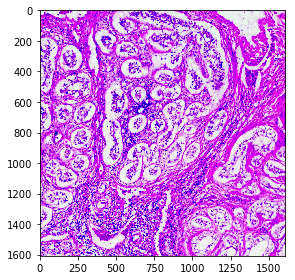

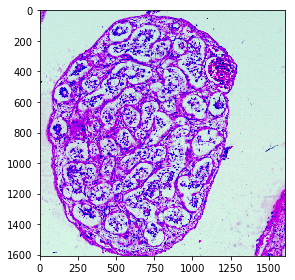

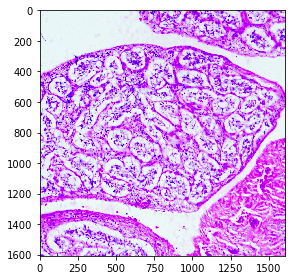

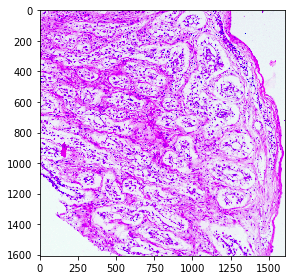

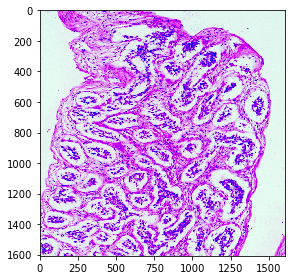

In [51]:
#Importar las librerias

import numpy as np

from skimage import data, exposure, img_as_float
from skimage import io, color, filters
from skimage import util

for i in range(len(lstFiles)):
    img = io.imread(path+"/"+lstFiles[i])  #leer Imagen 10X
#img = io.imread("a-16001-20x-mac-3.png")  #leer Imagen 20X (1,2,3,4,5,6)
#img = io.imread("prueba.png")  #leer Imagen 20X
#img = io.imread("a-16002-40x-mac-01.png")  #leer Imagen 40X (01,02,03)

#print(img.dtype)  #imprimir tipo de dato de la imagen
    
    histo=exposure.histogram(img[:, :, 0])

    a=histo[1].min()
    a1=histo[1].max()

    histo=exposure.histogram(img[:, :, 1])

    b=histo[1].min()
    b1=histo[1].max()

    histo=exposure.histogram(img[:, :, 2])

    c=histo[1].min()
    c1=histo[1].max()

#Intento 1
    if(path=='10X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(1*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(2*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(4.5*c), c1))   # 10X=4.5 / 20X=12   / 40x=4
    
    if(path=='20X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(0.4*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(1*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(12*c), c1))   # 10X=4.5 / 20X=12   / 40x=4

    if(path=='40X'):
        img[:, :, 0]= exposure.rescale_intensity(img[:, :, 0], in_range=(a1-(0.7*a), a1)) # 10X=1 / 20X=0.4 / 40x=0.7
        img[:, :, 1]= exposure.rescale_intensity(img[:, :, 1], in_range=(b1-(1.2*b), b1))   # 10X=2 / 20X=1   / 40x=1.2
        img[:, :, 2]= exposure.rescale_intensity(img[:, :, 2], in_range=(c1-(4*c), c1))   # 10X=4.5 / 20X=12   / 40x=4
    
    io.imshow(img)
    io.show()

#io.imshow(equalize_hist_R)
#io.show()

    io.imsave(path+'/linealizacion/'+name[i]+'_linealize_hist.png',(img)) #guardar la imagen con linealizado